Setup and Simulation parameters

In [2]:
import random
import statistics
import sys
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator

RTT = [40, 55, 140, 180, 260]
B = (40/8) * 1000000 * 0.001   ##Bytes/ms
bytes = [i * 200000 for i in range(25)]
n_sim = 50

def computeLatency(l, m):
    LatencyTarzan = []
    LatencyMQTTA = []

    len_tarz = []
    len_mqtt = []
    for b in bytes:
        D_tarzan = []
        D_MQTTA = []

        for i in range(n_sim):
            l_tarzan = int(np.random.lognormal(mean=np.log(l), sigma=0.5))
            d = 0
            for j in range(l_tarzan):
                d = d + RTT[random.randint(a=0, b=len(RTT) - 1)]
            D_tarzan.append(d)

        for i in range(n_sim):
            pf = 1 - 1 / (l - 1)
            l_mqtta = 0
            while random.random() < pf:
                l_mqtta = l_mqtta + 1
            # len_mqtt.append(l_mqtta)
            d = 0
            for j in range(l_mqtta):
                d = d + RTT[random.randint(a=0, b=len(RTT) - 1)]
            D_MQTTA.append(d)

        D_avg_tarzan = statistics.mean(D_tarzan)
        D_avg_mqtta = statistics.mean(D_MQTTA)
        dev_std_tarzan = statistics.stdev(D_tarzan)
        dev_std_mqtta = statistics.stdev(D_MQTTA)
        B_per_mimic = B / m
        lat_tarzan = D_avg_tarzan + b / B_per_mimic
        lat_mqtta = D_avg_mqtta + b / B
        LatencyTarzan.append((lat_tarzan, dev_std_tarzan))
        LatencyMQTTA.append((lat_mqtta, dev_std_mqtta))
    return [LatencyTarzan, LatencyMQTTA]


def DrawPlot(LatencyTarzan, LatencyMQTTA):
    #plt.yticks(fontsize=30)
    #plt.xticks(fontsize=30)
    plt.xlabel("Bytes", fontsize=30)
    plt.ylabel("Latency[ms]", fontsize=30)
    plt.ticklabel_format(style='plain')
    plt.ylim([0, 10000])
    latencies_tarzan = [LatencyTarzan[i][0] for i in range(len(LatencyTarzan))]
    latencies_MQTTA = [LatencyMQTTA[i][0] for i in range(len(LatencyMQTTA))]
    std_tarzan = [LatencyTarzan[i][1] for i in range(len(LatencyTarzan))]
    std_MQTTA = [LatencyMQTTA[i][1] for i in range(len(LatencyMQTTA))]
    plt.errorbar(x=bytes, y=latencies_tarzan, yerr=std_tarzan, label="Our Proposal")
    plt.errorbar(x=bytes, y=latencies_MQTTA, yerr=std_MQTTA, label="MQTT-A")
    plt.legend(fontsize=30)
    plt.subplots_adjust(bottom=0.14)
    plt.show()



Figure 3

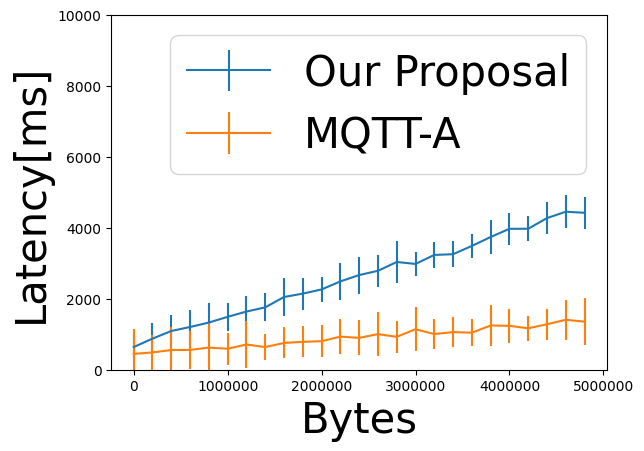

In [3]:
latencies=computeLatency(5,4)
DrawPlot(LatencyTarzan=latencies[0],LatencyMQTTA=latencies[1])

Figure 4

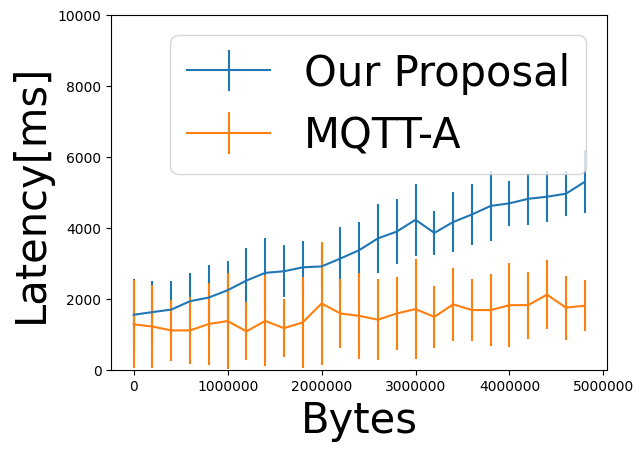

In [4]:
latencies=computeLatency(10,4)
DrawPlot(LatencyTarzan=latencies[0],LatencyMQTTA=latencies[1])

Figure 5

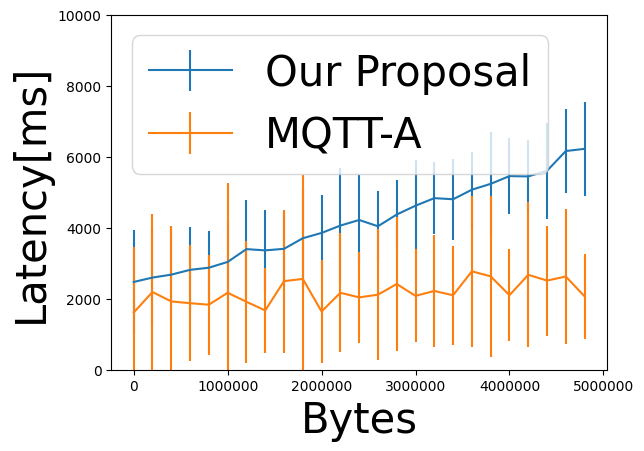

In [5]:
latencies=computeLatency(15,4)
DrawPlot(LatencyTarzan=latencies[0],LatencyMQTTA=latencies[1])

Figure 6

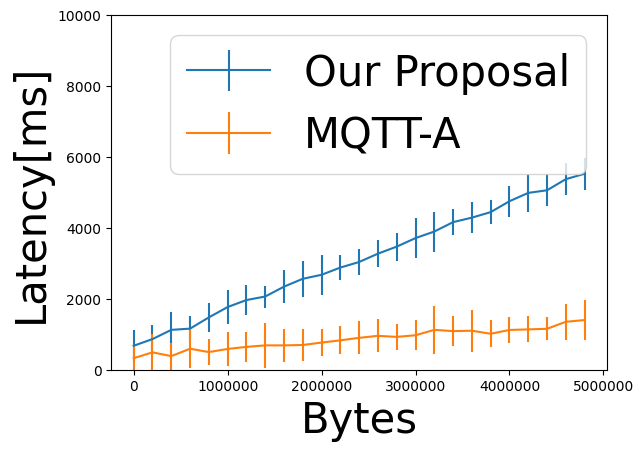

In [6]:
latencies=computeLatency(5,5)
DrawPlot(LatencyTarzan=latencies[0],LatencyMQTTA=latencies[1])

Figure 7

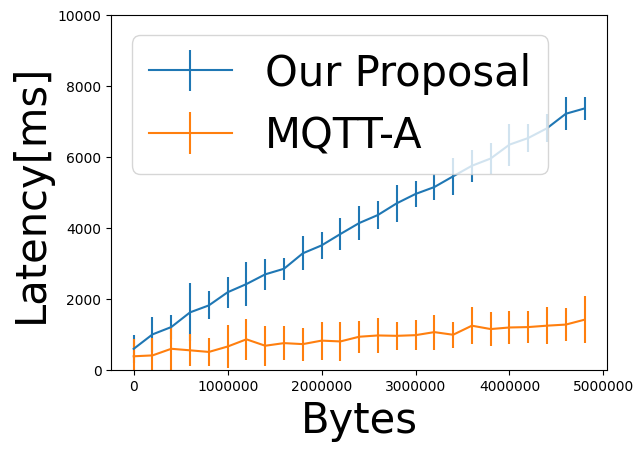

In [7]:
latencies=computeLatency(5,7)
DrawPlot(LatencyTarzan=latencies[0],LatencyMQTTA=latencies[1])

Figure 8

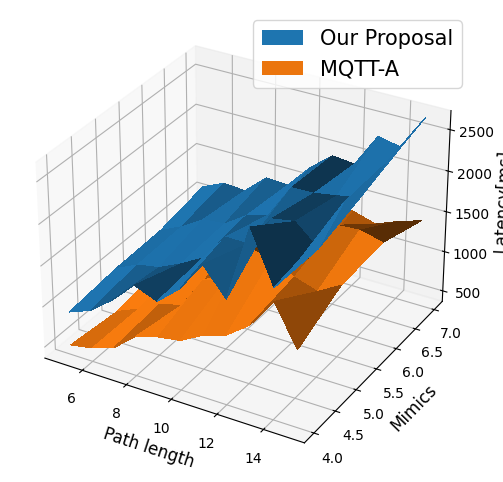

In [8]:
lengths = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
mimics = [4, 5, 6, 7]
X, Y = np.meshgrid(lengths, mimics)

ZTarz = np.matrix([[j for i in range(len(lengths))] for j in range(len(mimics))])
ZMQTTA = np.matrix([[j for i in range(len(lengths))] for j in range(len(mimics))])

for i in range(len(mimics)):
    for j in range(len(lengths)):
        m = mimics[i]
        le = lengths[j]
        latencies = computeLatency(le, m)
        LatencyTarzan = latencies[0]
        LatencyMQTTA = latencies[1]

        ZTarz[i,j] = LatencyTarzan[1][0]
        ZMQTTA[i,j] = LatencyMQTTA[1][0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(6)
fig.set_figwidth(6)

surf = ax.plot_surface(X, Y, ZTarz,
                       linewidth=0, antialiased=False, label="Our Proposal")
surf1 = ax.plot_surface(X, Y, ZMQTTA,
                       linewidth=0, antialiased=False, label="MQTT-A")
ax.set_xlabel('Path length',fontsize = 12)
ax.set_ylabel('Mimics', fontsize = 12)
ax.set_zlabel('Latency[ms]', fontsize = 12)


plt.legend(fontsize=15)


plt.show()

Figure 9

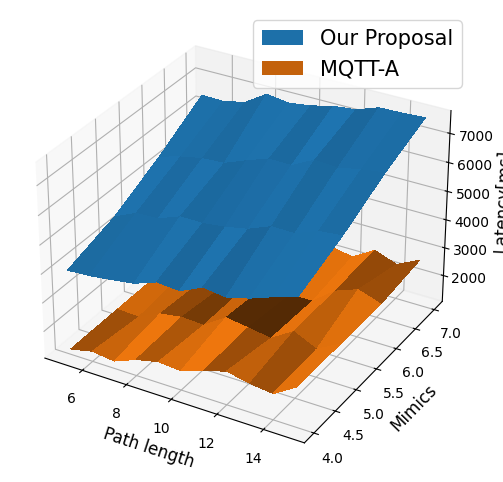

In [9]:
lengths = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
mimics = [4, 5, 6, 7]
X, Y = np.meshgrid(lengths, mimics)

ZTarz = np.matrix([[j for i in range(len(lengths))] for j in range(len(mimics))])
ZMQTTA = np.matrix([[j for i in range(len(lengths))] for j in range(len(mimics))])

for i in range(len(mimics)):
    for j in range(len(lengths)):
        m = mimics[i]
        le = lengths[j]
        latencies = computeLatency(le, m)
        LatencyTarzan = latencies[0]
        LatencyMQTTA = latencies[1]

        ZTarz[i,j] = LatencyTarzan[20][0]
        ZMQTTA[i,j] = LatencyMQTTA[20][0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(6)
fig.set_figwidth(6)

surf = ax.plot_surface(X, Y, ZTarz,
                       linewidth=0, antialiased=False, label="Our Proposal")
surf1 = ax.plot_surface(X, Y, ZMQTTA,
                       linewidth=0, antialiased=False, label="MQTT-A")
ax.set_xlabel('Path length',fontsize = 12)
ax.set_ylabel('Mimics', fontsize = 12)
ax.set_zlabel('Latency[ms]', fontsize = 12)


plt.legend(fontsize=15)


plt.show()